# **Imobiliária Medeiros**
1- Crie uma nova coluna chamada: "dormitory_type"
    - Se o valor da coluna "badrooms" for igual a 1 -> 'studio'
    - Se o valor da coluna "badrooms" for igual a 2 -> 'apartament'
    - Se o valor da coluna "badrooms" for maior que 2 -> 'house'

2- Faça um gráfico de barras que represente a soma dos preços pelo número de quartos.

3- Faça um gráfico de linhas que represente a média dos preços pelo ano de construção dos imóveis.

4- Faça um gráfico de barras que represente a média dos preços pelo tipo dos dormitórios.

5- Faça um gráfico de linha que mostre a evolução da média dos preços pelo ano da reforma dos imóveis, a partir do ano de 1930.

6- Faça uma tabela que mostre a média dos preços por ano de construção e tipo de dormitórios dos imóveis.

7- Crie um dashboard com os gráficos das questões 2,3 e 4 ( Dashborads: 1 linha e 2 colunas )

8- Crie um dashboard com os gráficos da perguntas 2 e 4 ( 2 colunas )

9- Crie um dashboard com os gráficos da perguntas 3 e 5 ( 2 linhas )



In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import gridspec

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
dataset = pd.read_csv('dataset/kc_house_data.csv')

In [3]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


# 1- Crie uma nova coluna chamada: "dormitory_type"
    - Se o valor da coluna "badrooms" for igual a 1 -> 'studio'
    - Se o valor da coluna "badrooms" for igual a 2 -> 'apartament'
    - Se o valor da coluna "badrooms" for maior que 2 -> 'house'

In [4]:
dataset['dormitory_type'] = ""
dataset.loc[dataset['bedrooms'] == 1, 'dormitory_type'] = 'studio'
dataset.loc[dataset['bedrooms'] == 2, 'dormitory_type'] = 'apartament'
dataset.loc[dataset['bedrooms'] > 2, 'dormitory_type'] = 'house'

# 2- Faça um gráfico de barras que represente a soma dos preços pelo número de quartos.

    bedrooms         price
0          0    5323550.00
1          1   63210934.00
2          2 1107788602.00
3          3 4580263939.00
4          4 4372957028.00
5          5 1259346326.00
6          6  224541613.00
7          7   36145017.00
8          8   14366000.00
9          9    5363999.00
10        10    2458000.00
11        11     520000.00
12        33     640000.00


<BarContainer object of 13 artists>

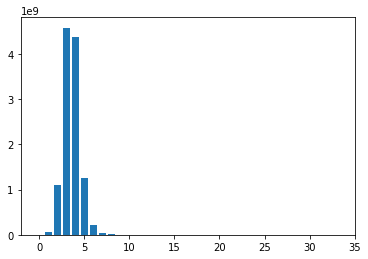

In [5]:
data = dataset[['price','bedrooms']].groupby('bedrooms').sum().reset_index()
print(data)
plt.bar(data['bedrooms'],data['price'])


# 3- Faça um gráfico de linhas que represente a média dos preços pelo ano de construção dos imóveis.

     yr_built     price
0        1900 581387.21
1        1901 556935.93
2        1902 673007.41
3        1903 480958.20
4        1904 583756.64
..        ...       ...
111      2011 544522.00
112      2012 527447.34
113      2013 678545.45
114      2014 683681.75
115      2015 759785.16

[116 rows x 2 columns]


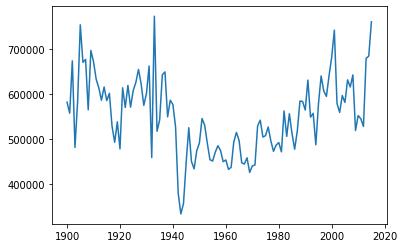

In [6]:
data = dataset[['price','yr_built']].groupby('yr_built').mean().reset_index()
print(data)
plt.plot(data['yr_built'],data['price'])

# 4- Faça um gráfico de barras que represente a média dos preços pelo tipo dos dormitórios.

  dormitory_type     price
0                409503.85
1     apartament 401372.68
2          house 563092.21
3         studio 317642.88


<BarContainer object of 4 artists>

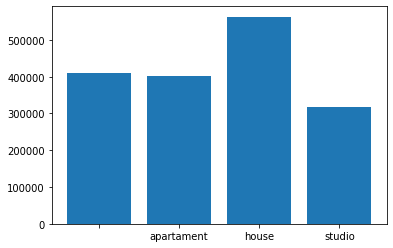

In [7]:
data = dataset[['price','dormitory_type']].groupby('dormitory_type').mean().reset_index()
print(data)
plt.bar(data['dormitory_type'],data['price'])

# 5- Faça um gráfico de linha que mostre a evolução da média dos preços pelo ano da reforma dos imóveis, a partir do ano de 1930.


    yr_renovated     price
0           1934 459950.00
1           1940 378400.00
2           1944 521000.00
3           1945 398666.67
4           1946 351137.50
..           ...       ...
64          2011 607496.15
65          2012 625181.82
66          2013 664663.51
67          2014 654756.25
68          2015 658843.75

[69 rows x 2 columns]


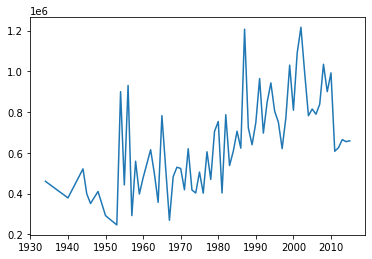

In [8]:
# selecionando apenas as colunas com ano de reforma a partir de 1930
df_1930 = dataset.loc[dataset['yr_renovated'] > 1930]
df_1930 = df_1930[['price','yr_renovated']].groupby('yr_renovated').mean().reset_index()
print(df_1930)
plt.plot(df_1930['yr_renovated'],df_1930['price'])

# 6- Faça uma tabela que mostre a média dos preços por ano de construção e tipo de dormitórios dos imóveis.

# 7- Crie um dashboard com os gráficos das questões 2,3 e 4 ( Dashborads: 1 linha e 2 colunas )

<BarContainer object of 4 artists>

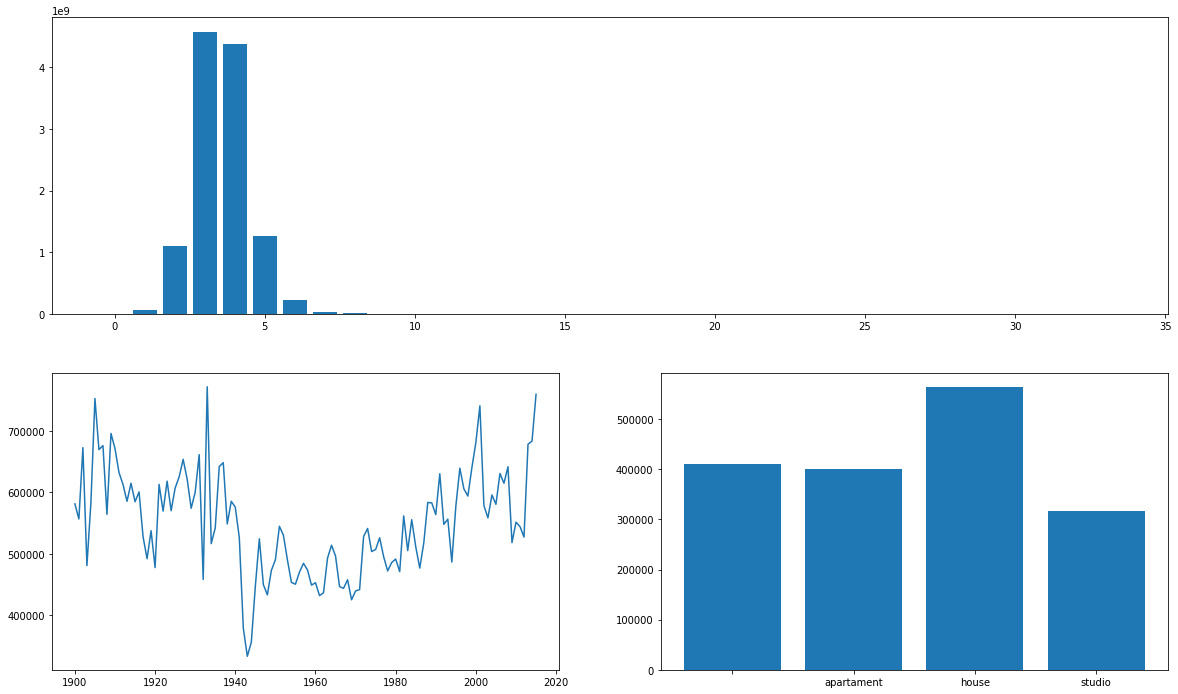

In [9]:
fig = plt.figure( figsize=(20,12) )
specs = gridspec.GridSpec( ncols=2, nrows=2, figure=fig )

ax1 = fig.add_subplot( specs[0, :] )
ax2 = fig.add_subplot( specs[1, 0] )
ax3 = fig.add_subplot( specs[1, 1] )

data = dataset[['price','bedrooms']].groupby('bedrooms').sum().reset_index()
ax1.bar(data['bedrooms'],data['price'])

data = dataset[['price','yr_built']].groupby('yr_built').mean().reset_index()
ax2.plot(data['yr_built'],data['price'])

data = dataset[['price','dormitory_type']].groupby('dormitory_type').mean().reset_index()
ax3.bar(data['dormitory_type'],data['price'])





# 8- Crie um dashboard com os gráficos da perguntas 2 e 4 ( 2 colunas )

<BarContainer object of 4 artists>

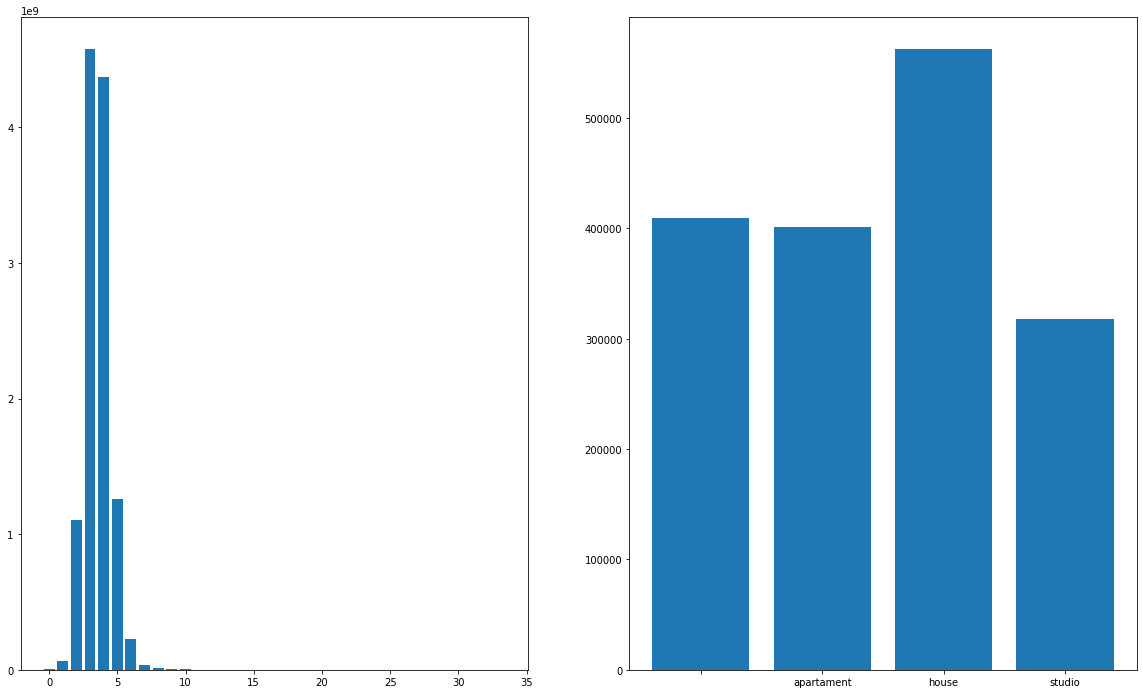

In [10]:
fig = plt.figure( figsize=(20,12) )
specs = gridspec.GridSpec( ncols=2, nrows=1, figure=fig )

ax1 = fig.add_subplot( specs[0, 0] )
ax2 = fig.add_subplot( specs[0, 1] )
#ax3 = fig.add_subplot( specs[1, 1] )

data = dataset[['price','bedrooms']].groupby('bedrooms').sum().reset_index()
ax1.bar(data['bedrooms'],data['price'])

#data = dataset[['price','yr_built']].groupby('yr_built').mean().reset_index()
#ax2.plot(data['yr_built'],data['price'])

data = dataset[['price','dormitory_type']].groupby('dormitory_type').mean().reset_index()
ax2.bar(data['dormitory_type'],data['price'])


# 9- Crie um dashboard com os gráficos da perguntas 3 e 5 ( 2 linhas )

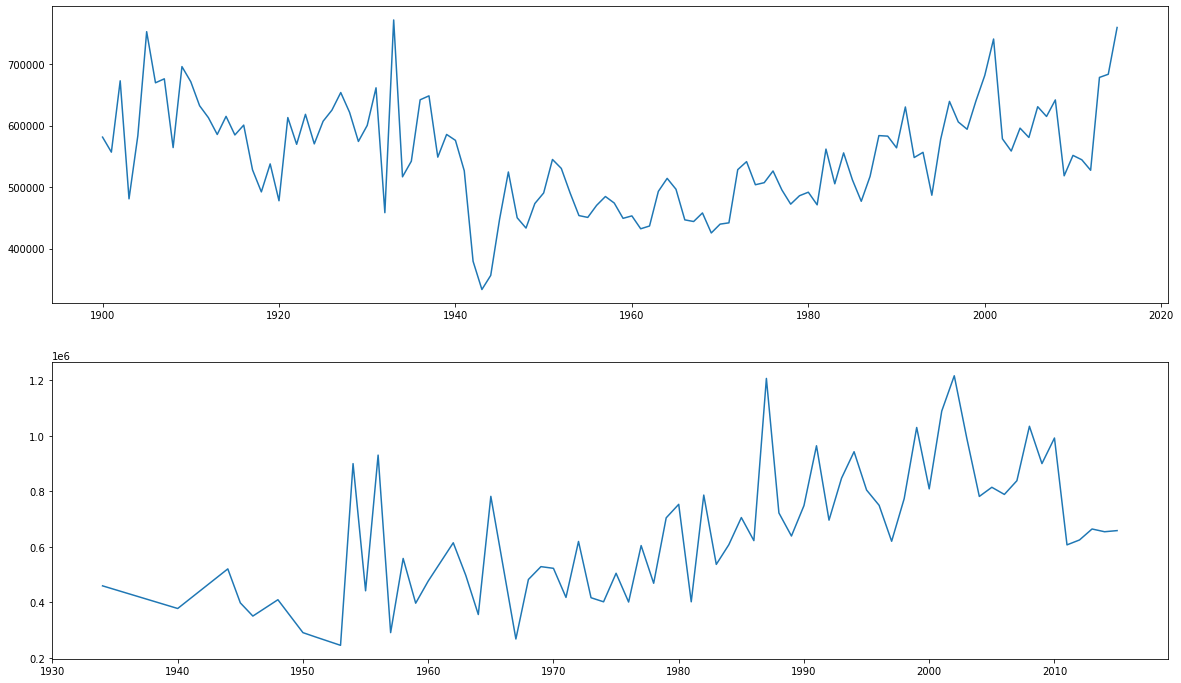

In [11]:
fig = plt.figure( figsize=(20,12) )
specs = gridspec.GridSpec( ncols=1, nrows=2, figure=fig )

ax1 = fig.add_subplot( specs[0, :] )
ax2 = fig.add_subplot( specs[1, :] )

data = dataset[['price','yr_built']].groupby('yr_built').mean().reset_index()
ax1.plot(data['yr_built'],data['price'])

df_1930 = dataset.loc[dataset['yr_renovated'] > 1930]
df_1930 = df_1930[['price','yr_renovated']].groupby('yr_renovated').mean().reset_index()
ax2.plot(df_1930['yr_renovated'],df_1930['price'])
